## Assignment 1 
## SYSC 4415

In [ ]:
"""
GENERAL NOTE: Please print out numbers (i.e., accuracies, plots, etc.) so they are displayed to me when I run your cells. Use python's print() function.
"""

# import everything you might need

import torch
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error
import pandas as pd
from xgboost import XGBClassifier
import xgboost as xgb
import random
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from tqdm import tqdm

**QUESTION 1**

In [ ]:
"""
Q1: Calculate the gradient of the f(x, y, z) = 7x2z – 2xy3 + 5z at (-1, -2, 3). What does this vector represent?
"""

'\nQ1: Calculate the gradient of the f(x, y, z) = 7x2z – 2xy3 + 5z at (-1, -2, 3). What does this vector represent?\n'

**Solution**

We have
$$
  f(x, y, z) = 7x^2z - 2xy^3+5z
$$
$$
  \begin{align}
    \nabla f(x, y, z) 
    &= 
    \begin{bmatrix} 
      \frac{\partial f}{\partial x} \\  
      \frac{\partial f}{\partial y} \\
      \frac{\partial f}{\partial z} \\
    \end{bmatrix} 
    = 
    \begin{bmatrix} 
      14xz - 2y^3 \\
      -6xy^2 \\
      7x^2 + 5 \\
    \end{bmatrix} 
  \end{align}
$$

Then
$$
  \nabla f(-1, -2, 3) 
  = 
  \begin{bmatrix} 
      14(-1)(3) - 2(-2)^3 \\
      -6(-1)(-2)^2 \\
      7(-1)^2 + 5 \\
  \end{bmatrix}
  \Rightarrow
  \boxed{
    \nabla f(-1, -2, 3) 
    = 
    \begin{bmatrix} 
      -26 \\
      24 \\
      12 \\
    \end{bmatrix}
  }
$$

The vector $\nabla f(-1, 2, 3) = \begin{bmatrix} -26 & 24 & 12 \\ \end{bmatrix}^\intercal$ represents the **direction of steepest ascent on $f$** at the point $(-1, -2, 3)$. In other words, taking a (*very*) small step in this direction will increase the value of $f$ more than an equivalent step in any other direction. 

**QUESTION 2**

In [ ]:
# Let me download the files for you. [No]

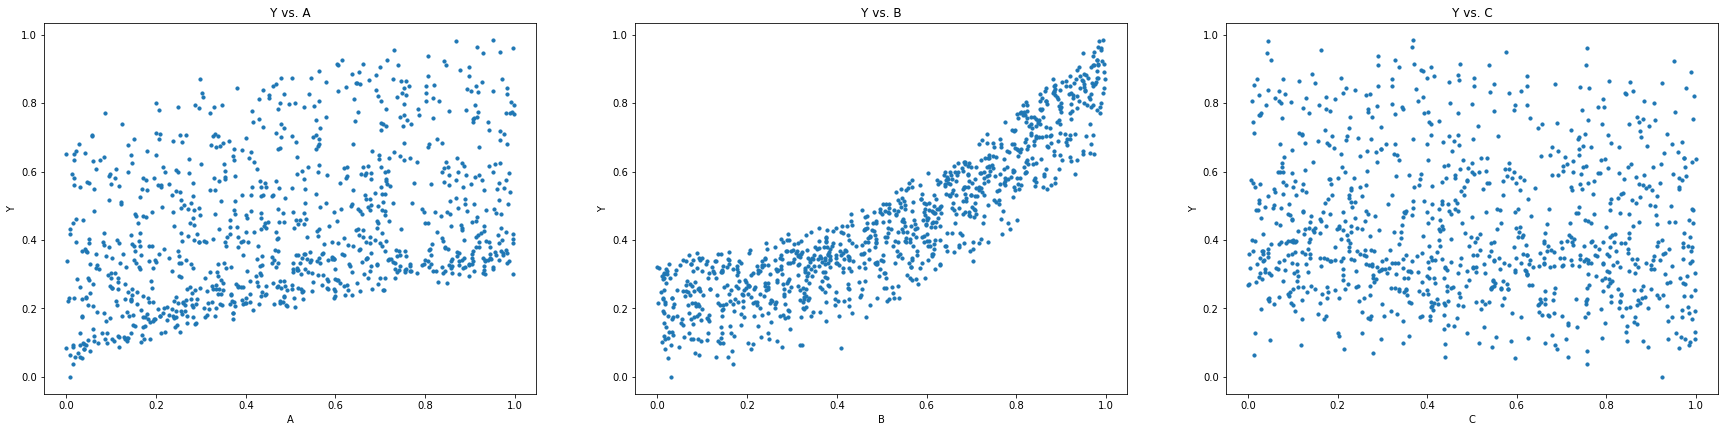

In [ ]:
"""
Q2a: Use pandas to load train.csv, val.csv, and test.csv into three separate dataframes. Then, create three scatter plots of the train set with features A, B, and C on the x-axes and Y on the y-axes.
"""

# Load the CSVs into a dataframe
URL = "https://github.com/jrgreen7/SYSC4906/releases/download/Ass1"
dataset_names = ["train", "val", "test"]

dset_to_url = { dset : f"{URL}/{dset}.csv" for dset in dataset_names }
dset_to_csv = { dset : pd.read_csv(dset_to_url[dset]) for dset in dataset_names }
dset_to_df = { dset : pd.DataFrame(dset_to_csv[dset]) for dset in dataset_names }

# Load train, val and test into 3 dfs
df_train = dset_to_df["train"]
df_val = dset_to_df["val"]
df_test = dset_to_df["test"]

# Create a figure with the three scatter plots (A, B, C vs Y) for the training set.
A_train = df_train["A"]
B_train = df_train["B"]
C_train = df_train["C"]
Y_train = df_train["Y"]

plt.figure(figsize=(30, 15))

plt.subplot(2, 3, 1); plt.scatter(A_train, Y_train, s=10); plt.xlabel("A"); plt.ylabel("Y"); plt.title("Y vs. A")
plt.subplot(2, 3, 2); plt.scatter(B_train, Y_train, s=10); plt.xlabel("B"); plt.ylabel("Y"); plt.title("Y vs. B")
plt.subplot(2, 3, 3); plt.scatter(C_train, Y_train, s=10); plt.xlabel("C"); plt.ylabel("Y"); plt.title("Y vs. C")

plt.show()

In [ ]:
"""
Q2b: If you were using A, B, and C to predict Y (i.e., using linear regression), how well do you think these features would perform? Do you think nonlinear functions would fit the data better? Why or why not?

Answer:
From the scatterplots:
A: 
There is a visibly positive and linear trend between A and Y, but with a high 
spread/variance. Despite this spread, it should still be possible to fit a 
linear model with some predictive power, hence A should perform well as a 
predictor.
B:
The relationship between B and Y is positive but clearly non-linear, thus it 
would benefit from having a non-linear fit (perhaps second-degree polynomial). 
However, it can still be approximated well with a linear model (it isn't too 
non-linear), and has less spread than A vs. Y. Thus we predict that B should 
perform similarly to as a predictor, likely better than A due to the lower 
spread with respect to Y.
C: 
We can see that variable C has very poor predictive power with respect to the 
response Y. The points in the (third) plot are scattered randomly and there is 
no perceivable trend (linear nor non-linear). We assume that C would perform poorly as a predictor.
"""

"\nQ2b: If you were using A, B, and C to predict Y (i.e., using linear regression), how well do you think these features would perform? Do you think nonlinear functions would fit the data better? Why or why not?\n\nAnswer:\nFrom the scatterplots:\nA: \nThere is a visibly positive and linear trend between A and Y, but with a high \nspread/variance. Despite this spread, it should still be possible to fit a \nlinear model with some predictive power, hence A should perform well as a \npredictor.\nB:\nThe relationship between B and Y is positive but clearly non-linear, thus it \nwould benefit from having a non-linear fit (perhaps second-degree polynomial). \nHowever, it can still be approximated well with a linear model (it isn't too \nnon-linear), and has less spread than A vs. Y. Thus we predict that B should \nperform similarly to as a predictor, likely better than A due to the lower \nspread with respect to Y.\nC: \nWe can see that variable C has very poor predictive power with respect 

In [ ]:
"""
Q2c: The data is already normalized, how can you tell?

We can tell that data is already normalized from the scatterplots (and output 
below) because the values for all features (A, B, C) and the response variable 
(Y) all lie in the (normalized) range [0, 1] which is expected from normalized 
data. Although, we don't seem to have perfect normalization (there should always
be at least one 0 value and one 1 value, but it's close enough).
"""

cols = ["A", "B", "C", "Y"]
for dset, df in dset_to_df.items():
  for col in cols:
    coldata = df[col]
    maxval = max(coldata)
    minval = min(coldata)

    print(f"[{dset}] {col} in [{minval}, {maxval}]") 

[train] A in [9.96202725218609e-05, 0.9982295036315918]
[train] B in [0.0, 0.9970993399620056]
[train] C in [0.0001083232054952, 0.9998052716255188]
[train] Y in [0.0, 0.9841378331184388]
[val] A in [0.003030638443306, 0.9984610676765442]
[val] B in [0.00112139666453, 0.9967607855796814]
[val] C in [0.0014540720731019, 1.0]
[val] Y in [0.0132349990308284, 1.0]
[test] A in [0.0, 1.0]
[test] B in [0.0001883903314592, 1.0]
[test] C in [0.0, 0.9996346235275269]
[test] Y in [0.004510807339102, 0.9947332143783568]


In [ ]:
"""
Q2d: For each of the three input features, compute its square-root to create 3 additional features. Repeat for squaring the feature values to create another 3 features.
You now have 9 total input features: A, B, C, sqrt(A), sqrt(B), sqrt(C), A2, B2, C2. 
Do this for all three data splits (train, val, and test). You can think of these as polynomial kernels used in SVMs.
"""

# Create and store the additional features for each df
for df in [df_train, df_val, df_test]:
  df["sqrt(A)"] = np.sqrt(df["A"])
  df["sqrt(B)"] = np.sqrt(df["B"])
  df["sqrt(C)"] = np.sqrt(df["C"])

  df["A2"] = df["A"] ** 2
  df["B2"] = df["B"] ** 2
  df["C2"] = df["C"] ** 2

# Print them for Anthony
sep = "-------------------"
print(f"Train\n{sep}")
print(df_train.head())
print(f"\nVal\n{sep}")
print(df_val.head())
print(f"\nTest\n{sep}")
print(df_test.head())

Train
-------------------
          A         B         C         Y  Label   sqrt(A)   sqrt(B)  \
0  0.433429  0.684660  0.100264  0.554477      5  0.658353  0.827442   
1  0.596584  0.427275  0.972302  0.344430      3  0.772389  0.653663   
2  0.884875  0.566586  0.014994  0.555790      5  0.940678  0.752719   
3  0.145045  0.427584  0.756287  0.228959      2  0.380848  0.653899   
4  0.237964  0.684935  0.348287  0.481648      4  0.487816  0.827608   

    sqrt(C)        A2        B2        C2  
0  0.316645  0.187861  0.468759  0.010053  
1  0.986054  0.355913  0.182564  0.945371  
2  0.122450  0.783005  0.321020  0.000225  
3  0.869648  0.021038  0.182828  0.571970  
4  0.590159  0.056627  0.469136  0.121304  

Val
-------------------
          A         B         C         Y  Label   sqrt(A)   sqrt(B)  \
0  0.225478  0.417502  0.658253  0.261007      2  0.474845  0.646144   
1  0.730810  0.025166  0.219302  0.300882      2  0.854874  0.158637   
2  0.098021  0.858857  0.857660  0.5

**QUESTION 3**

In [ ]:
"""
Q3a: Train a linear regression model on the train set using only the 3 original input features.
"""

# Setup data for Linear Regression
X = df_train[["A", "B", "C"]]
y = df_train["Y"]

# Fit the model
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

# Print the results for Anthony
print("Linear Regression:")
print("Intercept:", linear_regressor.intercept_)
print("Coefficients [A B C]:", linear_regressor.coef_)
print(f"Fitted model: y_hat = {linear_regressor.coef_[0]:.3f}*x_A + "
      + f"{linear_regressor.coef_[1]:.3f}*x_B + {linear_regressor.coef_[2]:.3f}*x_C + {linear_regressor.intercept_:.3f}")

Linear Regression:
Intercept: 0.0030530675285197484
Coefficients [A B C]: [ 0.26851499  0.66435995 -0.06032162]
Fitted model: y_hat = 0.269*x_A + 0.664*x_B + -0.060*x_C + 0.003


In [ ]:
"""
Q3b: What are the mean absolute errors of the train set, val set, and test sets using this model? Did the model overfit the train set?

Answer:
Respectively, the mean absolute errors of the train, val and test sets are 
~0.0430, ~0.0430, 0.0420. There is insufficient evidence to suggest the model 
has overfit the train set given that the MAE is still somewhat high (consider 
the data is normalized), and since the MAE/performance is similar across all 
sets, hence it would be reasonable to assume our model actually generalized.
"""

# Calculate mean absolute error
def calc_mae(X, y_true, model):
  y_pred = model.predict(X)
  return mean_absolute_error(y_true, y_pred)

for dset, df in dset_to_df.items():
  X = df[["A", "B", "C"]]
  y = df["Y"]
  print(f"{dset}: mean absolute error (MAE): {calc_mae(X, y, linear_regressor)}")

train: mean absolute error (MAE): 0.04297622772687733
val: mean absolute error (MAE): 0.042993924495539175
test: mean absolute error (MAE): 0.04199595732420805


In [ ]:
"""
Q3c: What are the values of the 4 learned parameters (3 weights and 1 bias)? Do these values make sense given your scatter plots in Q2a?

Answer:
The values of the 4 learned parameters are:
                 coef    
----------------------
intercept      0.0031   
A              0.2685     
B              0.6644     
C             -0.0603    
sqrt(A)        0.3294      
sqrt(B)      5.77e-05      
sqrt(C)        0.0002     
A2            -0.0011   
B2             0.6636 
C2             0.0001

These values do make sense given the scatter plots in Q2a. The contribution from 
C is low (near 0), as predicted, since the relationship between Y and C seemed 
to be random (i.e., C is a poor predictor). Both A and B have positive 
contributions, due to having positive relationships with Y. B's contribution is 
higher than A's because the change in Y with respect to a change in B (the slope
of the relationship) is bigger than that with respect to a change in A, as can 
be seen from the scatter plots. The intercept being small also makes sense given
that the combined trends of Y vs. A and Y vs. B would likely start around 0 for 
(A, B)=(0,0) due to A's contribution having a positive intercept but B's having 
a negative one. C's randomness likely means it had a less significant contribution
to determining the intercept.
"""

"\nQ3c: What are the values of the 4 learned parameters (3 weights and 1 bias)? Do these values make sense given your scatter plots in Q2a?\n\nAnswer:\nThe values of the 4 learned parameters are:\n                 coef    \n----------------------\nintercept      0.0031   \nA              0.2685     \nB              0.6644     \nC             -0.0603    \nsqrt(A)        0.3294      \nsqrt(B)      5.77e-05      \nsqrt(C)        0.0002     \nA2            -0.0011   \nB2             0.6636 \nC2             0.0001\n\nThese values do make sense given the scatter plots in Q2a. The contribution from \nC is low (near 0), as predicted, since the relationship between Y and C seemed \nto be random (i.e., C is a poor predictor). Both A and B have positive \ncontributions, due to having positive relationships with Y. B's contribution is \nhigher than A's because the change in Y with respect to a change in B (the slope\nof the relationship) is bigger than that with respect to a change in A, as can \n

In [ ]:
"""
Q3d: Train another linear regression model using all 9 input features.
"""

# Setup for Linear Regression
X = df_train[["A", "B", "C", "sqrt(A)", "sqrt(B)", "sqrt(C)", "A2", "B2", "C2"]]
y = df_train["Y"]

# Fit the model
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

# Print results for Anthony
print("Linear Regression:")
print("Intercept:", linear_regressor.intercept_)
print("Coefficients [A B C sqrtA sqrtB sqrtC A2 B2 C2]:\n", linear_regressor.coef_)

Linear Regression:
Intercept: 0.03170073560858788
Coefficients [A B C sqrtA sqrtB sqrtC A2 B2 C2]:
 [ 3.18658118e-03  4.12904461e-04 -6.66706794e-02  3.29369858e-01
  5.77037044e-05  1.93867238e-04 -1.14337648e-03  6.63574154e-01
  1.43711935e-04]


In [ ]:
"""
Q3e: What are the mean absolute errors of each dataset, using this new model?

Answer:
The mean absolute errors of for the train, val and test sets using the model 
are 2.65e-05, 2.28e-05, and 2.61e-05 respectively. Now we might've overfit ;).
"""
for dset, df in dset_to_df.items():
  X = df[["A", "B", "C", "sqrt(A)", "sqrt(B)", "sqrt(C)", "A2", "B2", "C2"]]
  y = df["Y"]
  print(f"{dset}: mean absolute error (MAE): {calc_mae(X, y, linear_regressor)}")

train: mean absolute error (MAE): 2.6489755248107204e-05
val: mean absolute error (MAE): 2.2842568580002835e-05
test: mean absolute error (MAE): 2.606980306402873e-05


In [ ]:
"""
Q3f: How many learned parameters are there for this model, and what are their values?

Answer:
There are 10 learned parameters for this model (9 weights, 1 bias). The values are as follows
                 coef    
----------------------
intercept      0.0317   
A              0.0032      
B              0.0004      
C             -0.0667      
sqrt(A)        0.3294      
sqrt(B)      5.77e-05      
sqrt(C)        0.0002     
A2            -0.0011   
B2             0.6636 
C2             0.0001
"""

'\nQ3f: How many learned parameters are there for this model, and what are their values?\n\nAnswer:\nThere are 10 learned parameters for this model (9 weights, 1 bias). The values are as follows\n                 coef    \n----------------------\nintercept      0.0317   \nA              0.0032      \nB              0.0004      \nC             -0.0667      \nsqrt(A)        0.3294      \nsqrt(B)      5.77e-05      \nsqrt(C)        0.0002     \nA2            -0.0011   \nB2             0.6636 \nC2             0.0001\n'

In [ ]:
"""
Q3g: Which model performs better? How can you explain the difference in performance?


Answer:
According to the MAE performance metric, the second model performs better since 
it has the smaller mean absolute error (i.e. more accurate predictions on average).
The improved performance can be explained by the fact that our response does not 
linearly depend on all of our predictors, specifically B (and it seems A was 
closer to a sqrt(.) than linear too). By adding the additional variables (sqrt, param^2) 
we basically computed a kernel (not really, but kind of) which allows the model 
to fit a non-linear curve to the data. Since the trend itself has non-linearities,
a non-linear model fits better than a linear one. This is confirmed by the higher
learned weights for sqrt(A) than A and for B2 than B.
"""

'\nQ3g: Which model performs better? How can you explain the difference in performance?\n\n\nAnswer:\nAccording to the MAE performance metric, the second model performs better since \nit has the smaller mean absolute error (i.e. more accurate predictions on average).\nThe improved performance can be explained by the fact that our response does not \nlinearly depend on all of our predictors, specifically B (and it seems A was \ncloser to a sqrt(.) than linear too). By adding the additional variables (sqrt, param^2) \nwe basically computed a kernel (not really, but kind of) which allows the model \nto fit a non-linear curve to the data. Since the trend itself has non-linearities,\na non-linear model fits better than a linear one. This is confirmed by the higher\nlearned weights for sqrt(A) than A and for B2 than B.\n'

**QUESTION 4**

In [ ]:
"""
Q4a: Use scikit-learn to train a logistic regression model on the train set using only the 3 original features. Again, just use the default hyper-parameters.
"""
# Setup data
X = df_train[["A", "B", "C"]]
y = df_train["Label"]

# Fit the model
logreg = LogisticRegression()
logreg.fit(X, y)

# Print results for Anthony
print("Logistic Regression:")
print("Intercept:", logreg.intercept_)
print("Coefficients [A B C]:\n", logreg.coef_)

Logistic Regression:
Intercept: [ 4.3125052   5.26679288  4.85088546  2.73171782  0.89104535 -0.92226194
 -2.78477548 -4.36935629 -5.60595534 -4.37059766]
Coefficients [A B C]:
 [[-5.67457287 -6.76060305  1.1851838 ]
 [-4.32041352 -7.63176394  1.07494527]
 [-1.35379936 -6.2239603   0.01419616]
 [ 0.69037418 -2.94909215  0.25828926]
 [ 1.00385032  0.19307679 -0.65826509]
 [ 0.89993409  2.61879989 -0.1418349 ]
 [ 0.77137494  4.6509133   0.13716775]
 [ 2.53544689  5.57055715 -0.67328117]
 [ 2.83415076  6.67419834 -0.62303146]
 [ 2.61365457  3.85787397 -0.57336962]]


In [ ]:
"""
Q4b: What are the overall accuracies of the train, val, and test sets? Use scikit-learn’s accuracy_score metric.

Answer:
Respectively, the overall accuracies for the train, val and test sets are 0.528, 0.452 and 0.481.
"""
# Calculate accuracies
for dset, df in dset_to_df.items():
  X = df[["A", "B", "C"]]
  y_true = df["Label"]
  y_pred = logreg.predict(X)
  accuracy = accuracy_score(y_true, y_pred)
  print(f"{dset} -> accuracy: {accuracy}")

train -> accuracy: 0.528
val -> accuracy: 0.452
test -> accuracy: 0.481


In [ ]:
"""
Q4c: Train another logistic regression model on the train set using all 9 features. If it doesn’t converge, set max_iter to 5,000.
"""

# Setup data
X = df_train[["A", "B", "C", "sqrt(A)", "sqrt(B)", "sqrt(C)", "A2", "B2", "C2"]]
y = df_train["Label"]

# Fit the model
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X, y)

# Print results for Anthony
print("Logistic Regression:")
print("Intercept:", logreg.intercept_)
print("Coefficients [A B C sqrtA sqrtB sqrtC A2 B2 C2]:\n", logreg.coef_)

Logistic Regression:
Intercept: [ 8.83099174  7.92106003  7.0699882   3.78433647 -0.05267214 -1.7124551
 -3.93187585 -6.26640423 -8.80281321 -6.8401559 ]
Coefficients [A B C sqrtA sqrtB sqrtC A2 B2 C2]:
 [[-3.64457031 -4.65457215  0.69592511 -4.31804109 -4.59708211  0.42958283
  -1.79984045 -3.0305566   0.76584561]
 [-2.75595727 -4.71955276  0.6502558  -0.76516768 -3.82528616  0.90023626
  -3.81160452 -3.84006878  0.18352733]
 [-0.64830182 -3.45478827  0.12911645 -0.37153767 -2.6240545  -0.0189265
  -1.67178451 -3.56926637  0.16737704]
 [-0.12390463 -1.27827463  0.24349606 -0.73020285  0.70744585 -0.18552741
   1.02615192 -3.81622535  0.30992081]
 [ 0.68392798  1.04801412 -0.42861978  0.79982313  2.02911022  0.12275719
   0.08339523 -2.27900946 -0.43583167]
 [ 0.52468998  2.0292531  -0.05125272  0.36533401  1.96498042 -0.2840894
   0.91960889  0.13986186 -0.03759532]
 [ 0.71197275  2.43473854 -0.09145232  0.44592491  1.66702324  0.34574492
   0.85577067  2.56066582 -0.23362417]
 [ 1.51

In [ ]:
"""
Q4d: Repeat b, but with your new logistic regression model.

Answer:
Respectively, the overall accuracies for the train, val and test sets are 0.635, 0.559 and 0.579.
"""

# Calculate accuracies
for dset, df in dset_to_df.items():
  X = df[["A", "B", "C", "sqrt(A)", "sqrt(B)", "sqrt(C)", "A2", "B2", "C2"]]
  y_true = df["Label"]
  y_pred = logreg.predict(X)
  accuracy = accuracy_score(y_true, y_pred)
  print(f"{dset} -> accuracy: {accuracy}")

train -> accuracy: 0.635
val -> accuracy: 0.559
test -> accuracy: 0.579


[GS] Accuracy@d=5: 0.817
[GS] Accuracy@d=10: 0.833
[GS] Accuracy@d=15: 0.823
[GS] Accuracy@d=20: 0.832
[GS] Accuracy@d=25: 0.832
[GS] Accuracy@d=30: 0.832
[GS] Accuracy@d=35: 0.832
[GS] Accuracy@d=40: 0.832
[GS] Accuracy@d=45: 0.832
[Grid search] The best max_depth hyperparam is: 10 with accuracy: 0.833
[CV] Accuracy@d=5: 0.843
[CV] Accuracy@d=10: 0.8480000000000001
[CV] Accuracy@d=15: 0.8450000000000001
[CV] Accuracy@d=20: 0.843
[CV] Accuracy@d=25: 0.843
[CV] Accuracy@d=30: 0.843
[CV] Accuracy@d=35: 0.843
[CV] Accuracy@d=40: 0.843
[CV] Accuracy@d=45: 0.843
[Cross validation] The best max_depth hyperparam is: 10 with accuracy: 0.8480000000000001


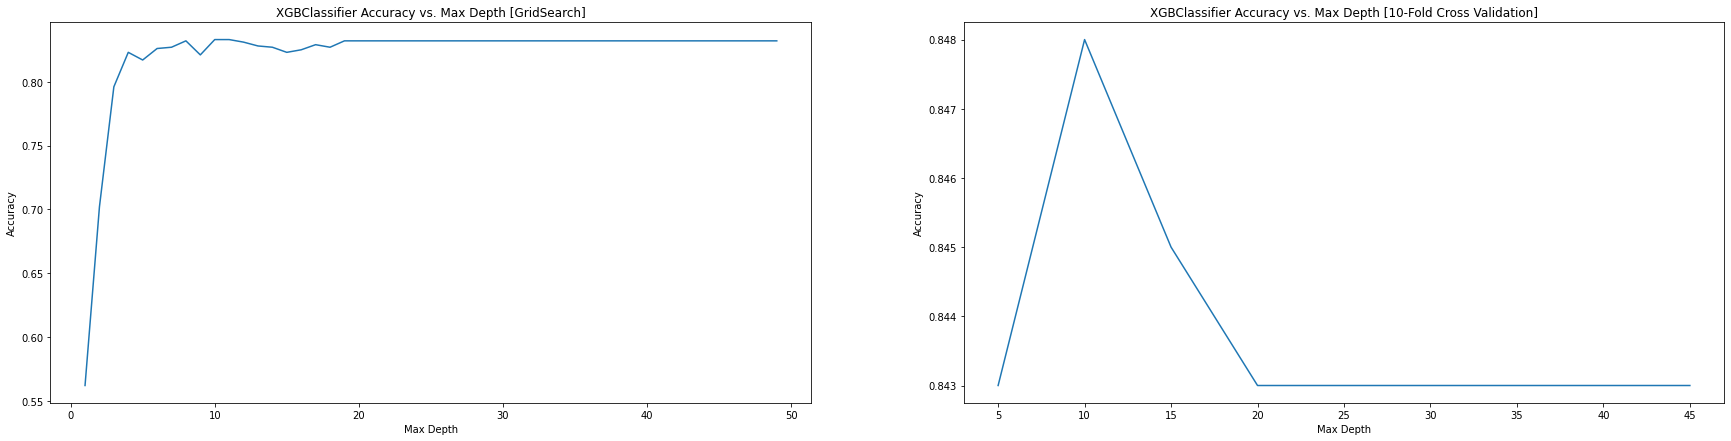

In [ ]:
"""
Q4e: XGBoost is pre-installed on Google Colab. One hyper-parameter is the depth of the tree (called max_depth). Find the optimal value of max_depth, all other hyper-parameters can be ignored for this question.
That is, your model should look like: model = XGBClassifier(max_depth=L).fit(X,y). 
Hint: the test set should not be used to search for hyper-parameters. Train these models using only the 3 original features.

Answer:
Both grid search and cross validation say d = 5 is the optimal max depth. 
"""

# We'll take two approaches, the first is grid search (best is 10)
# The second is cross-validation (we'll combine val and train and do a 10-fold 
# cross validation) (also best is 10)

X = df_train[["A", "B", "C", "sqrt(A)", "sqrt(B)", "sqrt(C)", "A2", "B2", "C2"]]
y = df_train["Label"]

X_val = df_val[["A", "B", "C", "sqrt(A)", "sqrt(B)", "sqrt(C)", "A2", "B2", "C2"]]
y_val = df_val["Label"]

def grid_search(X, y, X_val, y_val):
  best_accuracy_so_far = -1
  best_depth_so_far = -1

  # For plotting
  accuracies = []
  m_depths = []

  # Perform a linear grid search over depths in [1, 50]
  for max_depth in range(1, 50):
    xg_reg = XGBClassifier(max_depth=max_depth)
    xg_reg.fit(X, y)

    # evaluate accuracy
    preds = xg_reg.predict(X_val)
    accuracy = accuracy_score(y_val, preds)
    if max_depth % 5 == 0:
      print(f"[GS] Accuracy@d={max_depth}: {accuracy}")
    accuracies.append(accuracy)
    m_depths.append(max_depth)

    if (accuracy > best_accuracy_so_far):
      best_accuracy_so_far = accuracy
      best_depth_so_far = max_depth

  return best_depth_so_far, best_accuracy_so_far, m_depths, accuracies


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
def cross_validation(X, y, X_val, y_val):
  X_pool = pd.concat([X, X_val])
  y_pool = pd.concat([y, y_val])

  cv = KFold(n_splits=10, random_state=1, shuffle=True)

  best_accuracy_so_far = -1
  best_depth_so_far = -1

  # For plotting
  accuracies = []
  m_depths = []

  # Perform a linear grid search over depths in [1, 50]
  for max_depth in range(1, 50):
    xg_reg = XGBClassifier(max_depth=max_depth)
    scores = cross_val_score(xg_reg, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    accuracy = np.mean(scores)

    if max_depth % 5 == 0:
      print(f"[CV] Accuracy@d={max_depth}: {accuracy}")
      accuracies.append(accuracy)
      m_depths.append(max_depth)

      if (accuracy > best_accuracy_so_far):
        best_accuracy_so_far = accuracy
        best_depth_so_far = max_depth

  return best_depth_so_far, best_accuracy_so_far, m_depths, accuracies


best_depth_so_far, best_accuracy_so_far, m_depths, accuracies = grid_search(X, y, X_val, y_val)
print(f"[Grid search] The best max_depth hyperparam is: {best_depth_so_far} with accuracy: {best_accuracy_so_far}")

fig = plt.figure(figsize=(30, 7))

plt.subplot(1, 2, 1); plt.plot(m_depths, accuracies)
plt.title("XGBClassifier Accuracy vs. Max Depth [GridSearch]")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")

best_depth_so_far, best_accuracy_so_far, m_depths, accuracies = cross_validation(X, y, X_val, y_val)
print(f"[Cross validation] The best max_depth hyperparam is: {best_depth_so_far} with accuracy: {best_accuracy_so_far}")

plt.subplot(1, 2, 2); plt.plot(m_depths, accuracies)
plt.title("XGBClassifier Accuracy vs. Max Depth [10-Fold Cross Validation]")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()



In [ ]:
"""
Q4f: Repeat Step b, but with your new XGBoost model (with the max_depth chosen from e).
"""

X = df_train[["A", "B", "C", "sqrt(A)", "sqrt(B)", "sqrt(C)", "A2", "B2", "C2"]]
y = df_train["Label"]

# Really, we're good with anything >= 20ish, but 10 was marginally better and
# we prefer lower depth to reduce complexity and increasing generalization as well.
max_depth = 10
xg_reg = XGBClassifier(max_depth=max_depth)
xg_reg.fit(X, y)

for dset, df in dset_to_df.items():
  X = df[["A", "B", "C", "sqrt(A)", "sqrt(B)", "sqrt(C)", "A2", "B2", "C2"]]
  Y = df["Label"]
  testingResults = xg_reg.predict(X) # results of trained model on new data
  accuracy = accuracy_score(Y, testingResults)
  print(f"{dset}: accuracy: {accuracy}")

train: accuracy: 1.0
val: accuracy: 0.833
test: accuracy: 0.842


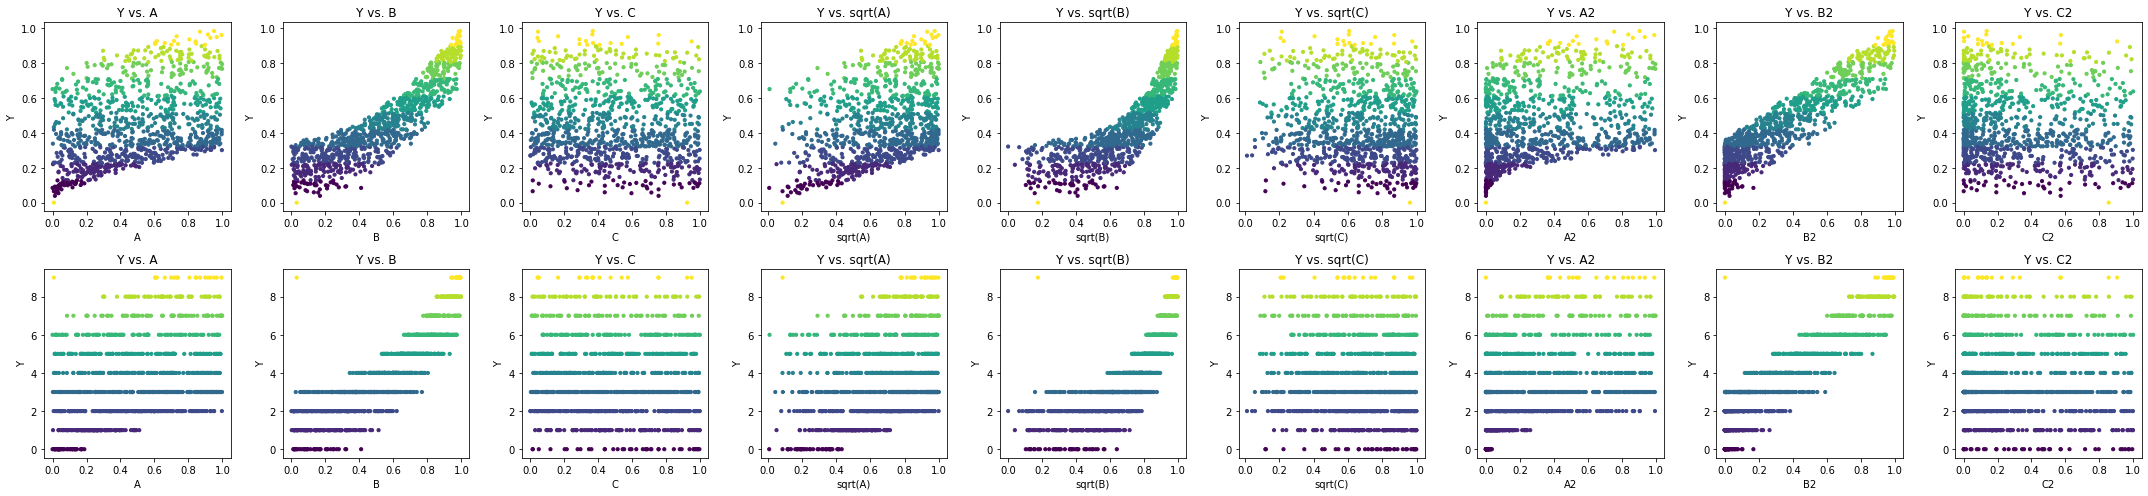

In [ ]:
"""
Q4g: Of your 3 models—two logistic regression models and one XGBoost model—which performs best on the test set? Why do you think this is the case?

Answer: 
Among the 3 models, XGBoost performs the best on the test set with 
accuracy 0.842 > 0.579 (logistic regression 2) > 0.481 (logistic regression 1).
From the scatter plots below, we can see that there is overlap between classes
with respect to the features, hence this classification problem is not separable
by a linear decision boundary. Thus, in this case, XGBoost is superior to a logistic
regression model as the former is a decision tree, a non-parameteric
model that can fit non-linear distributions given enough branches. The logistic
regression is a linear classifier that tries to fit a linear decision boundary
which will perform worse due to the overlap between classes leading to misclassification
that XGBoost avoids. The outlier (towards the bottom of the scatterplot, 
in yellow) likely biases the logistic model towards a poor fitted solution as well.

Note: The second row of plots clearly display the overlap between classes
with respect to features.
"""

labels = df_train["Label"]
fig = plt.figure(figsize=(30, 7))

plt.subplot(2, 9, 1); plt.scatter(A_train, Y_train, c=labels, s=10); plt.xlabel("A"); plt.ylabel("Y"); plt.title("Y vs. A")
plt.subplot(2, 9, 2); plt.scatter(B_train, Y_train, c=labels, s=10); plt.xlabel("B"); plt.ylabel("Y"); plt.title("Y vs. B")
plt.subplot(2, 9, 3); plt.scatter(C_train, Y_train, c=labels, s=10); plt.xlabel("C"); plt.ylabel("Y"); plt.title("Y vs. C")
plt.subplot(2, 9, 4); plt.scatter(df_train["sqrt(A)"], Y_train, c=labels, s=10); plt.xlabel("sqrt(A)"); plt.ylabel("Y"); plt.title("Y vs. sqrt(A)")
plt.subplot(2, 9, 5); plt.scatter(df_train["sqrt(B)"], Y_train, c=labels, s=10); plt.xlabel("sqrt(B)"); plt.ylabel("Y"); plt.title("Y vs. sqrt(B)")
plt.subplot(2, 9, 6); plt.scatter(df_train["sqrt(C)"], Y_train, c=labels, s=10); plt.xlabel("sqrt(C)"); plt.ylabel("Y"); plt.title("Y vs. sqrt(C)")
plt.subplot(2, 9, 7); plt.scatter(df_train["A2"], Y_train, c=labels, s=10); plt.xlabel("A2"); plt.ylabel("Y"); plt.title("Y vs. A2")
plt.subplot(2, 9, 8); plt.scatter(df_train["B2"], Y_train, c=labels, s=10); plt.xlabel("B2"); plt.ylabel("Y"); plt.title("Y vs. B2")
plt.subplot(2, 9, 9); plt.scatter(df_train["C2"], Y_train, c=labels, s=10); plt.xlabel("C2"); plt.ylabel("Y"); plt.title("Y vs. C2")

plt.subplot(2, 9, 10); plt.scatter(A_train, labels, c=labels, s=10); plt.xlabel("A"); plt.ylabel("Y"); plt.title("Y vs. A")
plt.subplot(2, 9, 11); plt.scatter(B_train, labels, c=labels, s=10); plt.xlabel("B"); plt.ylabel("Y"); plt.title("Y vs. B")
plt.subplot(2, 9, 12); plt.scatter(C_train, labels, c=labels, s=10); plt.xlabel("C"); plt.ylabel("Y"); plt.title("Y vs. C")
plt.subplot(2, 9, 13); plt.scatter(df_train["sqrt(A)"], labels, c=labels, s=10); plt.xlabel("sqrt(A)"); plt.ylabel("Y"); plt.title("Y vs. sqrt(A)")
plt.subplot(2, 9, 14); plt.scatter(df_train["sqrt(B)"], labels, c=labels, s=10); plt.xlabel("sqrt(B)"); plt.ylabel("Y"); plt.title("Y vs. sqrt(B)")
plt.subplot(2, 9, 15); plt.scatter(df_train["sqrt(C)"], labels, c=labels, s=10); plt.xlabel("sqrt(C)"); plt.ylabel("Y"); plt.title("Y vs. sqrt(C)")
plt.subplot(2, 9, 16); plt.scatter(df_train["A2"], labels, c=labels, s=10); plt.xlabel("A2"); plt.ylabel("Y"); plt.title("Y vs. A2")
plt.subplot(2, 9, 17); plt.scatter(df_train["B2"], labels, c=labels, s=10); plt.xlabel("B2"); plt.ylabel("Y"); plt.title("Y vs. B2")
plt.subplot(2, 9, 18); plt.scatter(df_train["C2"], labels, c=labels, s=10); plt.xlabel("C2"); plt.ylabel("Y"); plt.title("Y vs. C2")

fig.tight_layout()

plt.show()

**QUESTION 5**

In [ ]:
"""
Q5a: Using all 9 input features, we want to train a linear model (i.e., torch.nn.Linear) to predict the class label.
This is a multi-class classification problem, which of the following loss functions, available in PyTorch, best suits our task? Explain briefly.
torch.nn.CrossEntropyLoss()
torch.nn.MSELoss()
torch.nn.BCELoss()


Answer:
MSE loss is typically used for regression problems. BCE loss is used for binary
classification and does not work for our multiclass, single label classification
problem where we want to predict *one* class since the probabilities with BCE 
aren't constrained to 1. We want a distribution p(y|x, params) hence we want to 
use CrossEntropyLoss which will apply a softmax on the output logits, forcing 
a probability distribution across all our outputs, which is what we want.
CrossEntropyLoss will try to drive the probability of classifying the correct
class close to 1, while suppressing all other predictions to 0 (driving one output
to 1, necessarily decreases the others due to interdependent probabilities).
"""

"\nQ5a: Using all 9 input features, we want to train a linear model (i.e., torch.nn.Linear) to predict the class label.\nThis is a multi-class classification problem, which of the following loss functions, available in PyTorch, best suits our task? Explain briefly.\ntorch.nn.CrossEntropyLoss()\ntorch.nn.MSELoss()\ntorch.nn.BCELoss()\n\n\nAnswer:\nMSE loss is typically used for regression problems. BCE loss is used for binary\nclassification and does not work for our multiclass, single label classification\nproblem where we want to predict *one* class since the probabilities with BCE \naren't constrained to 1. We want a distribution p(y|x, params) hence we want to \nuse CrossEntropyLoss which will apply a softmax on the output logits, forcing \na probability distribution across all our outputs, which is what we want.\nCrossEntropyLoss will try to drive the probability of classifying the correct\nclass close to 1, while suppressing all other predictions to 0 (driving one output\nto 1, ne

In [ ]:
"""
Q5b: Your model will output 10 numbers, one for each class.
These are called logits. Do you need to compute the softmax across these 10 logits before applying your loss function (from a), or does the loss function compute the softmax for you?

Answer:
No, we don't need to compute the softmax across these logits since the
CrossEntropyLoss is defined such that it will apply the softmax. The loss function
expects the logits as input.
"""

"\nQ5b: Your model will output 10 numbers, one for each class.\nThese are called logits. Do you need to compute the softmax across these 10 logits before applying your loss function (from a), or does the loss function compute the softmax for you?\n\nAnswer:\nNo, we don't need to compute the softmax across these logits since the\nCrossEntropyLoss is defined such that it will apply the softmax. The loss function\nexpects the logits as input.\n"

Building datasets...
Chosen inputs: ['A', 'B', 'C', 'sqrt(A)', 'sqrt(B)', 'sqrt(C)', 'A2', 'B2', 'C2']
Chosen output: Label

train:
All data shape: torch.Size([1000, 10])
Inputs shape: torch.Size([1000, 9]), labels shape: torch.Size([1000])

val:
All data shape: torch.Size([1000, 10])
Inputs shape: torch.Size([1000, 9]), labels shape: torch.Size([1000])

test:
All data shape: torch.Size([1000, 10])
Inputs shape: torch.Size([1000, 9]), labels shape: torch.Size([1000])

Training...


  2%|▎         | 5/200 [00:02<01:38,  1.98it/s]

Epoch: 5,  train loss: 1.300140380859375,  test loss: 1.1700321435928345, val loss: 1.1946781873703003


  5%|▌         | 10/200 [00:04<01:16,  2.49it/s]

Epoch: 10,  train loss: 1.1243445873260498,  test loss: 1.0189663171768188, val loss: 1.0705190896987915


  8%|▊         | 15/200 [00:06<01:11,  2.58it/s]

Epoch: 15,  train loss: 1.0495514869689941,  test loss: 1.0591671466827393, val loss: 1.0881695747375488


 10%|█         | 20/200 [00:07<01:08,  2.62it/s]

Epoch: 20,  train loss: 0.9931185245513916,  test loss: 0.9367486238479614, val loss: 0.9894435405731201


 12%|█▎        | 25/200 [00:09<01:05,  2.65it/s]

Epoch: 25,  train loss: 0.9263673424720764,  test loss: 0.8126541972160339, val loss: 0.8718075752258301


 15%|█▌        | 30/200 [00:11<01:03,  2.66it/s]

Epoch: 30,  train loss: 0.90415358543396,  test loss: 0.966302752494812, val loss: 0.994841456413269


 18%|█▊        | 35/200 [00:13<01:18,  2.10it/s]

Epoch: 35,  train loss: 0.8927614688873291,  test loss: 0.8601790070533752, val loss: 0.9013124108314514


 20%|██        | 40/200 [00:15<01:10,  2.27it/s]

Epoch: 40,  train loss: 0.8681246042251587,  test loss: 0.873717188835144, val loss: 0.9134924411773682


 22%|██▎       | 45/200 [00:17<01:00,  2.56it/s]

Epoch: 45,  train loss: 0.8250051140785217,  test loss: 0.8692204356193542, val loss: 0.9201620817184448


 25%|██▌       | 50/200 [00:19<01:12,  2.07it/s]

Epoch: 50,  train loss: 0.8284555673599243,  test loss: 0.8123273849487305, val loss: 0.8807696104049683


 28%|██▊       | 55/200 [00:21<01:03,  2.30it/s]

Epoch: 55,  train loss: 0.8053832054138184,  test loss: 0.7442566156387329, val loss: 0.8065019845962524


 30%|███       | 60/200 [00:23<00:54,  2.59it/s]

Epoch: 60,  train loss: 0.7848560810089111,  test loss: 0.7964726686477661, val loss: 0.8690066933631897


 32%|███▎      | 65/200 [00:25<01:01,  2.18it/s]

Epoch: 65,  train loss: 0.7855174541473389,  test loss: 0.826741635799408, val loss: 0.8849554061889648


 35%|███▌      | 70/200 [00:28<01:00,  2.14it/s]

Epoch: 70,  train loss: 0.7657440900802612,  test loss: 0.749043881893158, val loss: 0.8197593092918396


 38%|███▊      | 75/200 [00:29<00:49,  2.54it/s]

Epoch: 75,  train loss: 0.7547717094421387,  test loss: 0.8290646076202393, val loss: 0.9123404622077942


 40%|████      | 80/200 [00:31<00:45,  2.64it/s]

Epoch: 80,  train loss: 0.7491703033447266,  test loss: 0.7311785221099854, val loss: 0.7806410193443298


 42%|████▎     | 85/200 [00:33<00:43,  2.64it/s]

Epoch: 85,  train loss: 0.75099778175354,  test loss: 0.7148312330245972, val loss: 0.769871711730957


 45%|████▌     | 90/200 [00:35<00:41,  2.64it/s]

Epoch: 90,  train loss: 0.7377105355262756,  test loss: 0.7647837996482849, val loss: 0.8336568474769592


 48%|████▊     | 95/200 [00:36<00:39,  2.64it/s]

Epoch: 95,  train loss: 0.7529851794242859,  test loss: 0.9400842785835266, val loss: 1.0289582014083862


 50%|█████     | 100/200 [00:39<00:49,  2.03it/s]

Epoch: 100,  train loss: 0.715478777885437,  test loss: 0.7768523097038269, val loss: 0.8715726137161255


 52%|█████▎    | 105/200 [00:41<00:40,  2.32it/s]

Epoch: 105,  train loss: 0.7188168168067932,  test loss: 0.7331787943840027, val loss: 0.7901002168655396


 55%|█████▌    | 110/200 [00:43<00:34,  2.60it/s]

Epoch: 110,  train loss: 0.7038596272468567,  test loss: 0.7567964196205139, val loss: 0.8238287568092346


 57%|█████▊    | 115/200 [00:44<00:32,  2.63it/s]

Epoch: 115,  train loss: 0.7018104791641235,  test loss: 0.7973871231079102, val loss: 0.9147202372550964


 60%|██████    | 120/200 [00:46<00:30,  2.61it/s]

Epoch: 120,  train loss: 0.6926509141921997,  test loss: 0.6662758588790894, val loss: 0.7414150834083557


 62%|██████▎   | 125/200 [00:48<00:28,  2.66it/s]

Epoch: 125,  train loss: 0.6995570063591003,  test loss: 0.662675678730011, val loss: 0.7482187747955322


 65%|██████▌   | 130/200 [00:50<00:26,  2.65it/s]

Epoch: 130,  train loss: 0.6870307326316833,  test loss: 0.6224369406700134, val loss: 0.7059459686279297


 68%|██████▊   | 135/200 [00:52<00:33,  1.95it/s]

Epoch: 135,  train loss: 0.6843374371528625,  test loss: 0.8564934134483337, val loss: 0.9389907717704773


 70%|███████   | 140/200 [00:54<00:24,  2.45it/s]

Epoch: 140,  train loss: 0.6855801939964294,  test loss: 0.7307935357093811, val loss: 0.8045242428779602


 72%|███████▎  | 145/200 [00:56<00:21,  2.58it/s]

Epoch: 145,  train loss: 0.6708094477653503,  test loss: 0.7229390144348145, val loss: 0.7956278324127197


 75%|███████▌  | 150/200 [00:58<00:19,  2.62it/s]

Epoch: 150,  train loss: 0.6840384602546692,  test loss: 0.6564400792121887, val loss: 0.7219135165214539


 78%|███████▊  | 155/200 [00:59<00:17,  2.64it/s]

Epoch: 155,  train loss: 0.6798304915428162,  test loss: 0.6462862491607666, val loss: 0.7153823375701904


 80%|████████  | 160/200 [01:01<00:15,  2.65it/s]

Epoch: 160,  train loss: 0.652483344078064,  test loss: 0.7000057101249695, val loss: 0.7711983323097229


 82%|████████▎ | 165/200 [01:03<00:15,  2.20it/s]

Epoch: 165,  train loss: 0.6694951057434082,  test loss: 0.6249649524688721, val loss: 0.6963818073272705


 85%|████████▌ | 170/200 [01:06<00:14,  2.14it/s]

Epoch: 170,  train loss: 0.6417364478111267,  test loss: 0.7262173295021057, val loss: 0.8064711093902588


 88%|████████▊ | 175/200 [01:07<00:10,  2.50it/s]

Epoch: 175,  train loss: 0.653157114982605,  test loss: 0.688025951385498, val loss: 0.7567859888076782


 90%|█████████ | 180/200 [01:09<00:07,  2.59it/s]

Epoch: 180,  train loss: 0.6394090056419373,  test loss: 0.6648815870285034, val loss: 0.7427781820297241


 92%|█████████▎| 185/200 [01:11<00:05,  2.62it/s]

Epoch: 185,  train loss: 0.6396970748901367,  test loss: 0.7088572382926941, val loss: 0.774937629699707


 95%|█████████▌| 190/200 [01:13<00:05,  2.00it/s]

Epoch: 190,  train loss: 0.6352421641349792,  test loss: 0.8528267741203308, val loss: 0.9311860203742981


 98%|█████████▊| 195/200 [01:16<00:02,  2.13it/s]

Epoch: 195,  train loss: 0.6555700302124023,  test loss: 0.7008836269378662, val loss: 0.7612920999526978


100%|██████████| 200/200 [01:18<00:00,  2.55it/s]

Epoch: 200,  train loss: 0.6446699500083923,  test loss: 0.6887295246124268, val loss: 0.762648344039917


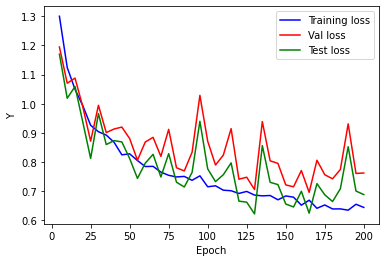

In [ ]:
"""
Q5c: Using the loss function from a, train a linear model using PyTorch and stochastic gradient descent (SGD).
Use a batch size of 1, a learning rate of 0.3 and train for 200 epochs. You can update your model weights “manually” or use an optimizer.
"""

def build_dataset(input_names, output_label, dataset, name):
  all_feature_vectors = []
  for idx in range(len(dataset)):
    X = dataset.iloc[idx][input_names]
    y = dataset.iloc[idx][output_label]

    feature_vector = np.append(X.to_numpy(), y)
    feature_vector = torch.Tensor(feature_vector).unsqueeze(dim=0)  # (1, num_features)
    
    all_feature_vectors.append(feature_vector)

  all_feature_vectors = torch.cat(all_feature_vectors, dim=0)  # (num_datapoints, num_features)

  print(f"{name}:")
  print(f'All data shape: {all_feature_vectors.shape}')

  inputs = all_feature_vectors[:, :len(input_names)]                            # (num_datapoints, num_inputs)
  labels = torch.squeeze(all_feature_vectors[:, len(input_names):].long(), -1)  # (num_datapoints, )

  print(f'Inputs shape: {inputs.shape}, labels shape: {labels.shape}\n')

  torch_dataset = TensorDataset(inputs, labels)
  return torch_dataset, inputs, labels

def build_datasets(train, val, test):
  input_names = ["A", "B", "C", "sqrt(A)", "sqrt(B)", "sqrt(C)", "A2", "B2", "C2"]
  output_label = "Label"

  print(f'Chosen inputs: {input_names}')
  print(f'Chosen output: {output_label}\n')

  return (build_dataset(input_names, output_label, dset, name) for dset, name in [(train, "train") , (val, "val"), (test, "test")])

print("Building datasets...")
train_dataset, val_dataset, test_dataset = build_datasets(df_train, df_val, df_test)

# Not shuffled (constant)
test_loader = DataLoader(test_dataset[0], batch_size=1)
val_loader = DataLoader(val_dataset[0], batch_size=1)
val_labels = val_dataset[2]
test_labels = test_dataset[2] 

# Shuffled at every epoch
train_loader = DataLoader(train_dataset[0], batch_size=1, shuffle=True)

def train(learning_rate=0.3, num_epochs=200, print_loss=True):
  # Randomized weights
  model = torch.nn.Linear(9, 10)
  opt = torch.optim.SGD(model.parameters(), learning_rate)
  loss_fn = torch.nn.CrossEntropyLoss()

  losses = {"train": [], "test": [], "val": []}
  epochs = []

  for epoch in tqdm(range(num_epochs)):
    train_losses = []
    for batch in train_loader:
      batch_input = batch[0]  # (batch_size, num_input_features)
      batch_output = batch[1]  # (batch_size, )

      out = model(batch_input)  # (batch_size, num_outputs_labels)
      # batch_output is the label which is already the index 0->9
      loss = loss_fn(out, batch_output)
      train_losses.append(loss.item())

      loss.backward()  # calculate gradients of every model parameter
      opt.step()  # use our optimizer to update model parameters
      opt.zero_grad()  # set gradients back to zero

    if print_loss and (epoch + 1) % 5 == 0:
      # after every 10 epochs lets calculate our val and test loss

      y_hat_t = []
      y_hat_v = []
      with torch.no_grad():
        for batch in val_loader:
          batch_input = batch[0]  # (batch_size, num_input_features)
          batch_output = batch[1]  # (batch_size, num_outputs_labels)

          out = model(batch_input)  # (batch_size, num_outputs_labels)
          y_hat_v.append(out)

        for batch in test_loader:
          batch_input = batch[0]  # (batch_size, num_input_features)
          batch_output = batch[1]  # (batch_size, num_outputs_labels)

          out = model(batch_input)  # (batch_size, num_outputs_labels)
          y_hat_t.append(out)

        y_hat_t = torch.cat(y_hat_t, dim=0)
        y_hat_v = torch.cat(y_hat_v, dim=0)

        test_loss = loss_fn(y_hat_t, test_labels).item()
        val_loss = loss_fn(y_hat_v, val_labels).item()
        train_loss_mean = torch.Tensor(train_losses).mean().item()

        losses["train"].append(train_loss_mean)
        losses["val"].append(val_loss)
        losses["test"].append(test_loss)
        epochs.append(epoch+1)

        print(f'Epoch: {epoch+1},  train loss: {train_loss_mean},  test loss: {test_loss}, val loss: {val_loss}')

  return model, epochs, losses

# Train the model and plot the losses (I know it isn't required, but looks nice)
print("Training...")
model, epochs, losses = train()
plt.plot(epochs, losses["train"], c="b", label="Training loss")
plt.plot(epochs, losses["val"], c="r", label="Val loss")
plt.plot(epochs, losses["test"], c="g", label="Test loss")
plt.xlabel("Epoch"); plt.ylabel("Y")
plt.legend(loc="upper right")

plt.show()

In [ ]:
"""
Q5d: Use the trained model to make predictions on the val and test sets. Calculate the overall accuracy of both sets.
"""

def calc_accuracy(loader, y, model):
  y_hat = []
  with torch.no_grad():
    for batch in loader:
      batch_input = batch[0]  # (batch_size, num_input_features)
      batch_output = batch[1]  # (batch_size, num_outputs_labels)

      out = model(batch_input)  # (batch_size, num_outputs_labels)
      probs = torch.softmax(out, dim = 1)
      winner = probs.argmax(dim = 1)
      y_hat.append(winner)

  y_hat = torch.cat(y_hat, dim=0)

  corrects = (y_hat == y)
  accuracy = corrects.sum().float() / float(y.size(0))
  return accuracy

accuracy_t = calc_accuracy(test_loader, test_labels, model=model)
accuracy_v = calc_accuracy(val_loader, val_labels, model=model)
print(f"Test accuracy: {accuracy_t}")
print(f"Val accuracy: {accuracy_v}")

Test accuracy: 0.7699999809265137
Val accuracy: 0.7429999709129333


In [ ]:
"""
Q5e: Repeat parts c and d three times. You should get different results each run. There are two main reasons for this. What are they?

Indeed, we can see below that the results are different each run. The reasons are
1. From the reference below, we can see that the Linear class in PyTorch
initializes the node weights *randomly* according to a uniform distribution
U(-sqrt(k), sqrt(k)) where k = 1/num_in_feats. Since the weights start at 
randomly different values, it is reasonable to assume they will converge to different
values assuming the loss landscape is non-convex. This leads to different models
with differing performances.

2. We are using stochastic gradient descent. Stochastic means random, specifically
in this case we are referring to the "shuffle=True" in our dataloader. We are shuffling
our training set each epoch and then performing gradient descent on the resulting
batches of size 1 (random order each epoch). Since this training process is 
randomized, it makes sense that we don't converge to the same solution all three times
as the optimization process will be performed on a different order of examples
each time, computing different gradients and leading to different solutions.
"""

for _ in range(3):
  model, _, _ = train(print_loss=False)
  accuracy_t = calc_accuracy(test_loader, test_labels, model=model)
  accuracy_v = calc_accuracy(val_loader, val_labels, model=model)
  print(f"Test accuracy: {accuracy_t}")
  print(f"Val accuracy: {accuracy_v}")

100%|██████████| 200/200 [01:10<00:00,  2.83it/s]


Test accuracy: 0.7850000262260437
Val accuracy: 0.7680000066757202


100%|██████████| 200/200 [01:10<00:00,  2.82it/s]


Test accuracy: 0.7170000076293945
Val accuracy: 0.7139999866485596


100%|██████████| 200/200 [01:11<00:00,  2.82it/s]

Test accuracy: 0.7179999947547913
Val accuracy: 0.7110000252723694
